<a href="https://colab.research.google.com/github/evanh1393/dsi_capstone/blob/main/02_main_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [12]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set_palette("Accent")

# Mounting Drive

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Datasets

In [15]:
# Creating the path of data
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/one-m-capstone/data/main/'

## Loading Dataframe

In [16]:
df = pd.read_csv(DATA_PATH + 'combined.csv').drop(columns=['Unnamed: 0'])

In [17]:
df.head()

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip,age_elab,occ_elab
0,1,Toy Story (1995),Animation Children's Comedy,1,5,978824268,F,1,10,48067,Under 18,K-12 student
1,48,Pocahontas (1995),Animation Children's Musical Romance,1,5,978824351,F,1,10,48067,Under 18,K-12 student
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,Under 18,K-12 student
3,260,Star Wars: Episode IV - A New Hope (1977),Action Adventure Fantasy Sci-Fi,1,4,978300760,F,1,10,48067,Under 18,K-12 student
4,527,Schindler's List (1993),Drama War,1,5,978824195,F,1,10,48067,Under 18,K-12 student


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000386 entries, 0 to 1000385
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1000386 non-null  int64 
 1   title       1000386 non-null  object
 2   genres      1000386 non-null  object
 3   user_id     1000386 non-null  int64 
 4   rating      1000386 non-null  int64 
 5   timestamp   1000386 non-null  int64 
 6   gender      1000386 non-null  object
 7   age         1000386 non-null  int64 
 8   occupation  1000386 non-null  int64 
 9   zip         1000386 non-null  object
 10  age_elab    1000386 non-null  object
 11  occ_elab    1000386 non-null  object
dtypes: int64(6), object(6)
memory usage: 91.6+ MB


# Ratings (The Label)



In [19]:
df['rating'].value_counts(normalize=True)

4    0.349013
3    0.261096
5    0.226223
2    0.107515
1    0.056152
Name: rating, dtype: float64

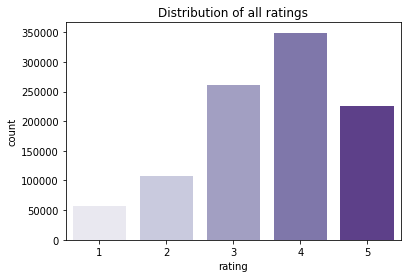

In [20]:
sns.countplot(data=df, x='rating', palette='Purples')
plt.title('Distribution of all ratings');

## Interpretation
Over half of our ratings are either 4 or 5s. This would imply that users largely enjoy the movies they watch. This also creates an issue of "rich-getting-riche" for a recommendation engine. Essentially engines suffer mechanically as users will often rate popular movies meaning the engine will learn about these popular movies more than the less popular ones. In my engine I break up the list of movies by popularty and feed movies that are less popular to the user for consideration. This at least gives an opportunity for those movies to be rated.

# Genres

In [21]:
df['genres'].value_counts()

Comedy                       116905
Drama                        111507
Comedy Romance                42716
Comedy Drama                  42254
Drama Romance                 29173
                              ...  
Drama Romance Western            29
Children's Fantasy               27
Comedy Film-Noir Thriller         5
Film-Noir Horror                  2
Fantasy                           1
Name: genres, Length: 301, dtype: int64

In [22]:
genre_df = df.copy()
genre_df['genres'] = genre_df['genres'].str.split(' ')
genre_df = genre_df.explode('genres')

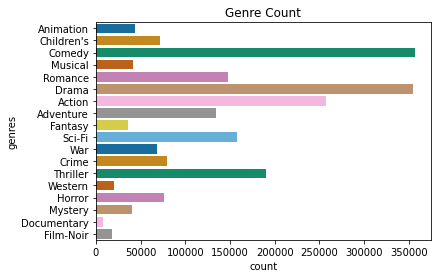

In [23]:
sns.countplot(y='genres', data=genre_df, palette='colorblind')
plt.title('Genre Count');

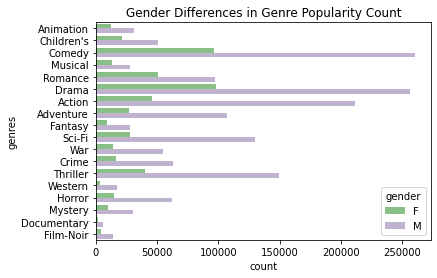

In [24]:
sns.countplot(y='genres', hue='gender', data=genre_df)
plt.title('Gender Differences in Genre Popularity Count');

## Interpretation
Genres has over 300 different genres, each genre is a combination of some fundamental singular genre. We will break down these genres naively by simply *exploding* the genre feature, and plotting the counts. Comedy, Drama, and Action are the most popular genres. We also have men representing a larger representation inside our dataset.

# Occupation

In [25]:
df.head()

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip,age_elab,occ_elab
0,1,Toy Story (1995),Animation Children's Comedy,1,5,978824268,F,1,10,48067,Under 18,K-12 student
1,48,Pocahontas (1995),Animation Children's Musical Romance,1,5,978824351,F,1,10,48067,Under 18,K-12 student
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,Under 18,K-12 student
3,260,Star Wars: Episode IV - A New Hope (1977),Action Adventure Fantasy Sci-Fi,1,4,978300760,F,1,10,48067,Under 18,K-12 student
4,527,Schindler's List (1993),Drama War,1,5,978824195,F,1,10,48067,Under 18,K-12 student


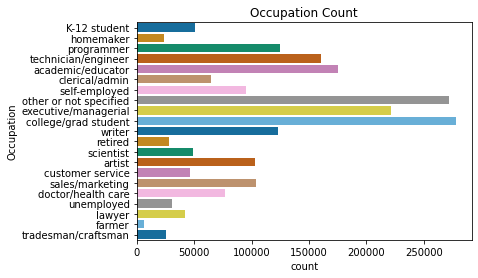

In [26]:
sns.countplot(y='occ_elab', data=genre_df, palette='colorblind')
plt.title('Occupation Count')
plt.ylabel('Occupation');

### What genres are popular with each profession?
No surprises as these are our two most popular genres by far.

In [27]:
df.groupby('occ_elab')['genres'].agg(pd.Series.mode)

occ_elab
K-12 student              Comedy
academic/educator          Drama
artist                     Drama
clerical/admin            Comedy
college/grad student      Comedy
customer service          Comedy
doctor/health care         Drama
executive/managerial       Drama
farmer                    Comedy
homemaker                 Comedy
lawyer                    Comedy
other or not specified    Comedy
programmer                Comedy
retired                    Drama
sales/marketing           Comedy
scientist                  Drama
self-employed             Comedy
technician/engineer       Comedy
tradesman/craftsman       Comedy
unemployed                Comedy
writer                     Drama
Name: genres, dtype: object

# Titles

### Most Popular Titles

Text(0.5, 1.0, 'Most Popular Movies')

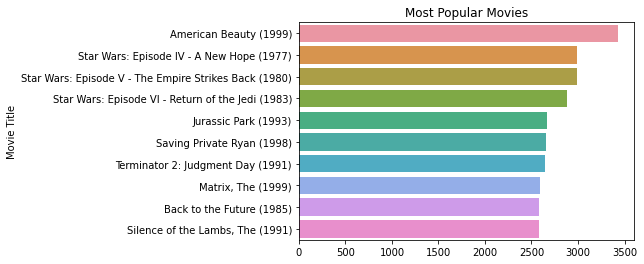

In [28]:
popular_titles = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
sns.barplot(y=popular_titles.index, x=popular_titles.values,)
plt.ylabel('Movie Title')
plt.title('Most Popular Movies')

### Average ratings of the most popular titles

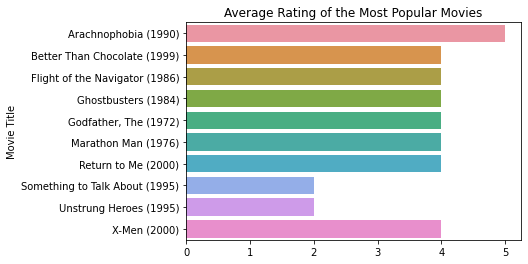

In [29]:
avg_rating = df.loc[popular_titles.values].groupby('title')['rating'].mean()
sns.barplot(y=avg_rating.index, x=avg_rating.values)
plt.ylabel('Movie Title')
plt.title('Average Rating of the Most Popular Movies');